In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=4, micro=5, releaselevel='final', serial=0)

In [3]:
import tensorflow as tf
tf.__version__

'0.12.1'

In [6]:
!pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17"

    100% |████████████████████████████████| 34.0MB 50kB/s eta 0:00:011 4% |█▍                              | 1.4MB 5.9MB/s eta 0:00:06    5% |█▉                              | 2.0MB 6.6MB/s eta 0:00:05    13% |████▏                           | 4.4MB 5.1MB/s eta 0:00:06    22% |███████▏                        | 7.6MB 6.2MB/s eta 0:00:05    22% |███████▍                        | 7.8MB 3.0MB/s eta 0:00:09    24% |████████                        | 8.5MB 6.6MB/s eta 0:00:04    31% |██████████▏                     | 10.8MB 5.6MB/s eta 0:00:05    50% |████████████████▎               | 17.3MB 5.0MB/s eta 0:00:04    58% |██████████████████▊             | 19.9MB 2.0MB/s eta 0:00:07    59% |███████████████████             | 20.3MB 5.9MB/s eta 0:00:03    95% |██████████████████████████████▋ | 32.5MB 7.5MB/s eta 0:00:01
    100% |████████████████████████████████| 11.9MB 108kB/s ta 0:00:011  3% |█▏                              | 419kB 11.2MB/s eta 0:00:02    6% |██                              | 727

In [7]:
# First check the Python version
import sys
if sys.version_info < (3,4):
    print('You are running an older version of Python!\n\n' \
          'You should consider updating to Python 3.4.0 or ' \
          'higher as the libraries built for this course ' \
          'have only been tested in Python 3.4 and higher.\n')
    print('Try installing the Python 3.5 version of anaconda '
          'and then restart `jupyter notebook`:\n' \
          'https://www.continuum.io/downloads\n\n')

# Now get necessary libraries
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
except ImportError:
    print('You are missing some packages! ' \
          'We will try installing them before continuing!')
    !pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17"
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    print('Done!')

# Import Tensorflow
try:
    import tensorflow as tf
except ImportError:
    print("You do not have tensorflow installed!")
    print("Follow the instructions on the following link")
    print("to install tensorflow before continuing:")
    print("")
    print("https://github.com/pkmital/CADL#installation-preliminaries")

# This cell includes the provided libraries from the zip file
try:
    from libs import utils
except ImportError:
    print("Make sure you have started notebook in the same directory" +
          " as the provided zip file which includes the 'libs' folder" +
          " and the file 'utils.py' inside of it.  You will NOT be able"
          " to complete this assignment unless you restart jupyter"
          " notebook inside the directory created by extracting"
          " the zip file or cloning the github repo.")

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
# Bit of formatting because inline code is not styled very good by default:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

In [12]:
# read filenames in car-data directory

dirname = "cardata"

filenames = [os.path.join(dirname, fname) for fname in os.listdir(dirname)]

filenames = filenames[:100]

assert(len(filenames) == 100)

In [13]:
# read image files
imgs = [plt.imread(fname)[..., :3] for fname in filenames]

# crop files to a square
imgs = [utils.imcrop_tosquare(img_i) for img_i in imgs]

# resize the square image in 100x100 pixels
imgs = [resize(img_i, (100, 100)) for img_i in imgs]

# combine our 3D images into 4D array with first dimension is number of images
imgs = np.array(imgs).astype(np.float32)

/usr/local/lib/python3.4/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.4/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.4/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.4/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.4/site-packages/skimage/transform/_warps.py:84: U

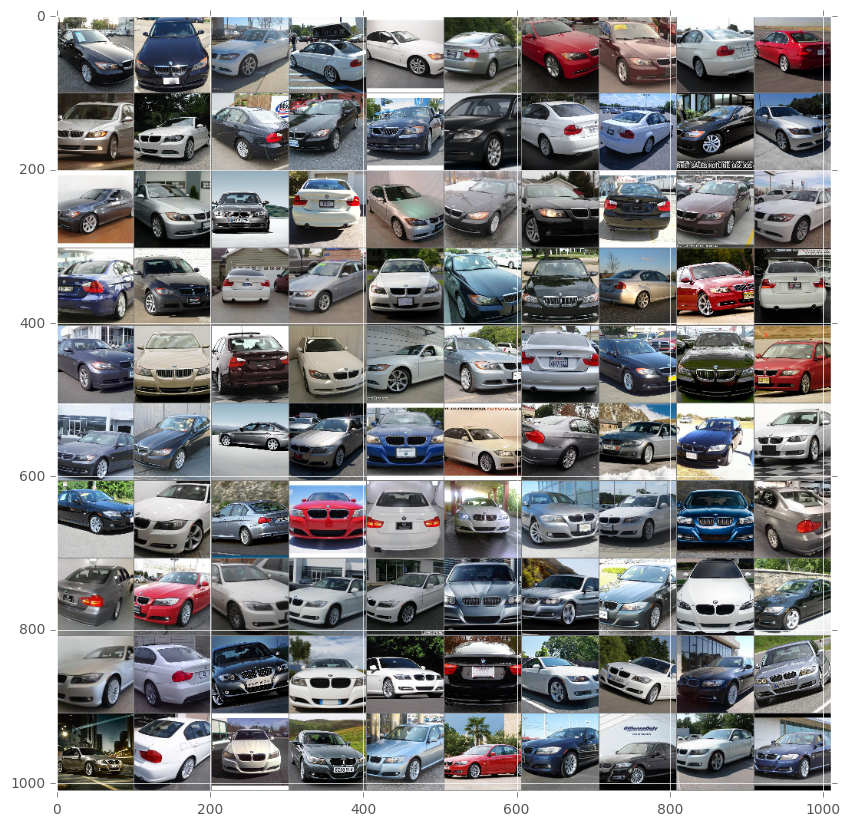

In [14]:
# make sure we have a 4D images array
# N x W x H x C
assert(imgs.shape == (100, 100, 100, 3))
plt.figure(figsize=(10,10))
plt.imshow(utils.montage(imgs, saveto='dataset.png'))

In [29]:
# compute mean image

sess = tf.Session()
mean_img_op = tf.reduce_mean(imgs, axis = 0)

mean_img = sess.run(mean_img_op)

In [30]:
assert(mean_img.shape == (100,100,3))

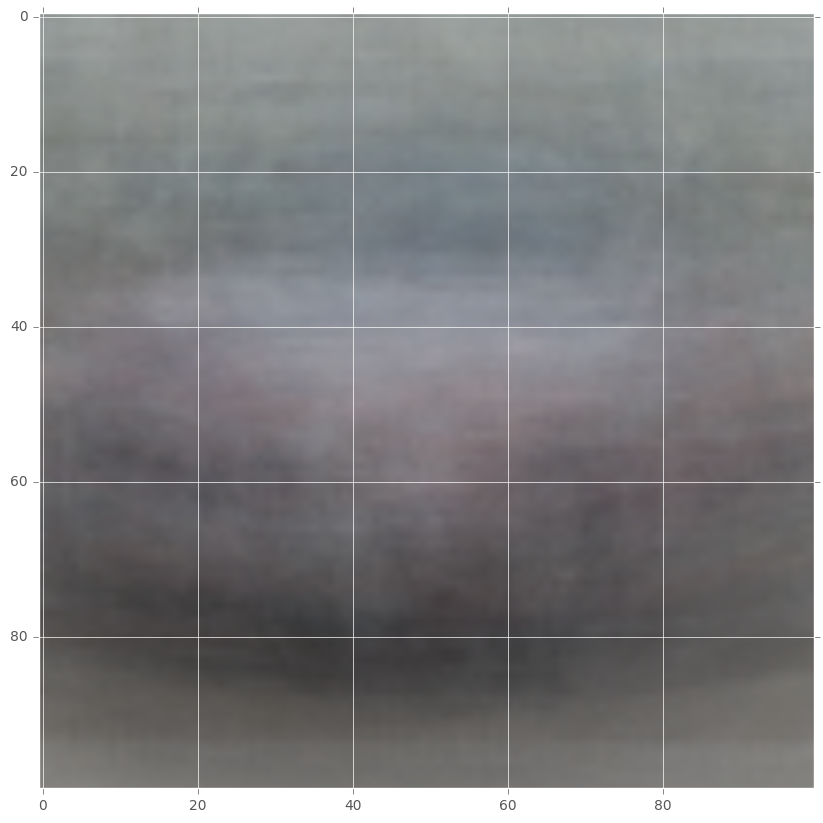

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(mean_img)
plt.imsave(arr=mean_img, fname='mean.png')

In [32]:
# mean image 4D
mean_img_4d = tf.reduce_mean(imgs, axis=0, keep_dims=True)
mean_img_4d.get_shape().as_list()

[1, 100, 100, 3]

In [36]:
subtraction = imgs - mean_img_4d

std_img_op = tf.sqrt(tf.reduce_mean(subtraction * subtraction, axis=0))
std_img = sess.run(std_img_op)

In [37]:
std_img.shape 

(100, 100, 3)

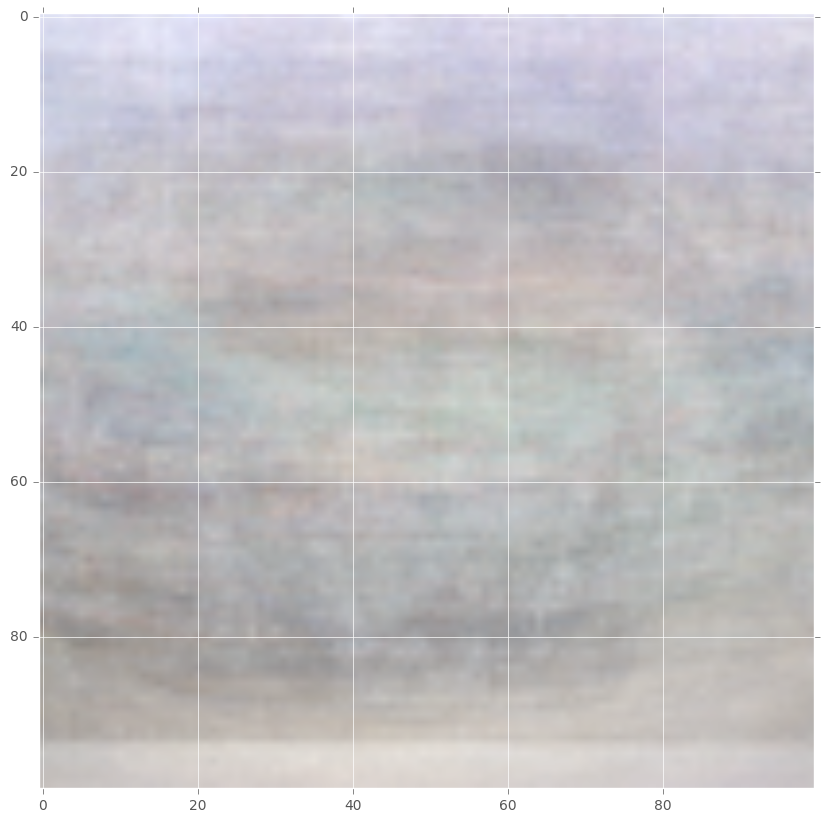

In [39]:
plt.figure(figsize=(10,10))
std_img_show = std_img / np.max(std_img)
plt.imshow(std_img_show)
plt.imsave(arr=std_img_show, fname='std_dev.png')

In [43]:
norm_imgs_op = subtraction / std_img

In [44]:
norm_imgs = sess.run(norm_imgs_op)

In [48]:
print(np.min(norm_imgs), np.max(norm_imgs))
print(norm_imgs.dtype)
print(norm_imgs.shape)

-2.5584 3.45549
float32
(100, 100, 100, 3)


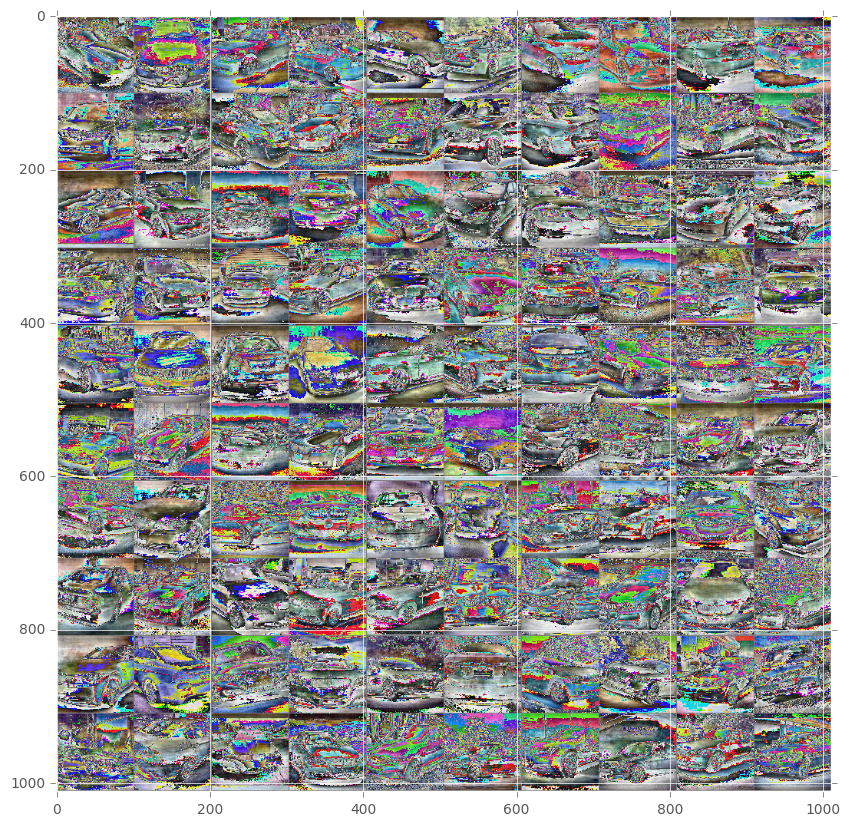

In [49]:
assert(norm_imgs.shape == (100, 100, 100, 3))
plt.figure(figsize=(10,10))
plt.imshow(utils.montage(norm_imgs, 'normalized.png'))

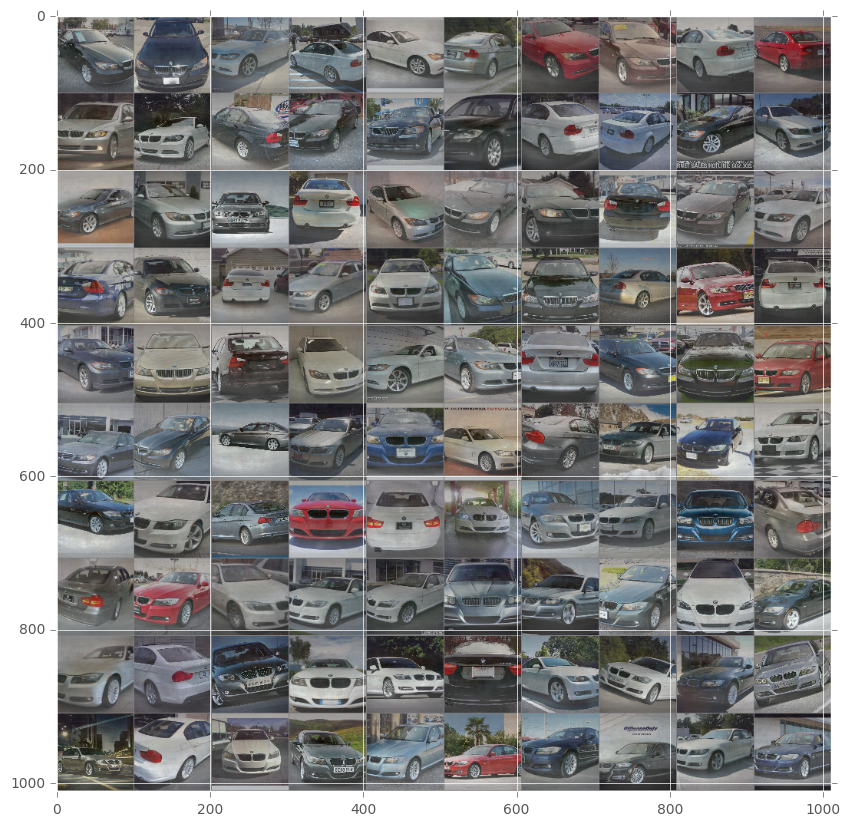

In [51]:
norm_imgs_show = (norm_imgs - np.min(norm_imgs))/(np.max(norm_imgs) - np.min(norm_imgs))
plt.figure(figsize=(10,10))
plt.imshow(utils.montage(norm_imgs_show, 'normalized_11.png'))

In [52]:
# Convolve the dataset
# build 3 kernels for each channel

ksize = 5

kernel = np.concatenate([utils.gabor(ksize)[:, :, np.newaxis] for i in range(3)], axis=2)
print(kernel.shape)

(5, 5, 3)


In [54]:
# make kernels into the size ksize x ksize x 3 x 1
kernel_4d = np.reshape(kernel, [ksize, ksize, 3, 1])
print(kernel_4d.shape)

(5, 5, 3, 1)


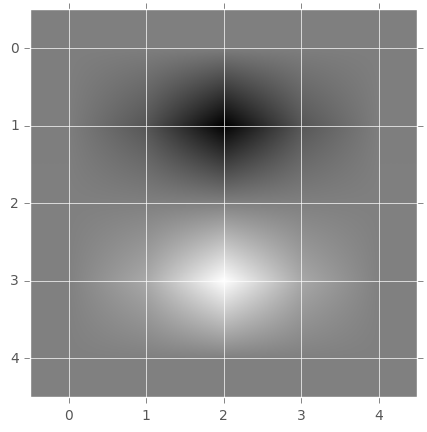

In [55]:
# display the Gabor kernel
plt.figure(figsize=(5,5))
plt.imshow(kernel_4d[:, :, 0, 0], cmap='gray')
plt.imsave(arr=kernel_4d[:, :, 0, 0,], fname='kernel.png', cmap='gray')

In [56]:
# make the convolution

convolved = utils.convolve(norm_imgs_show, kernel_4d)

(100, 100, 100, 1)


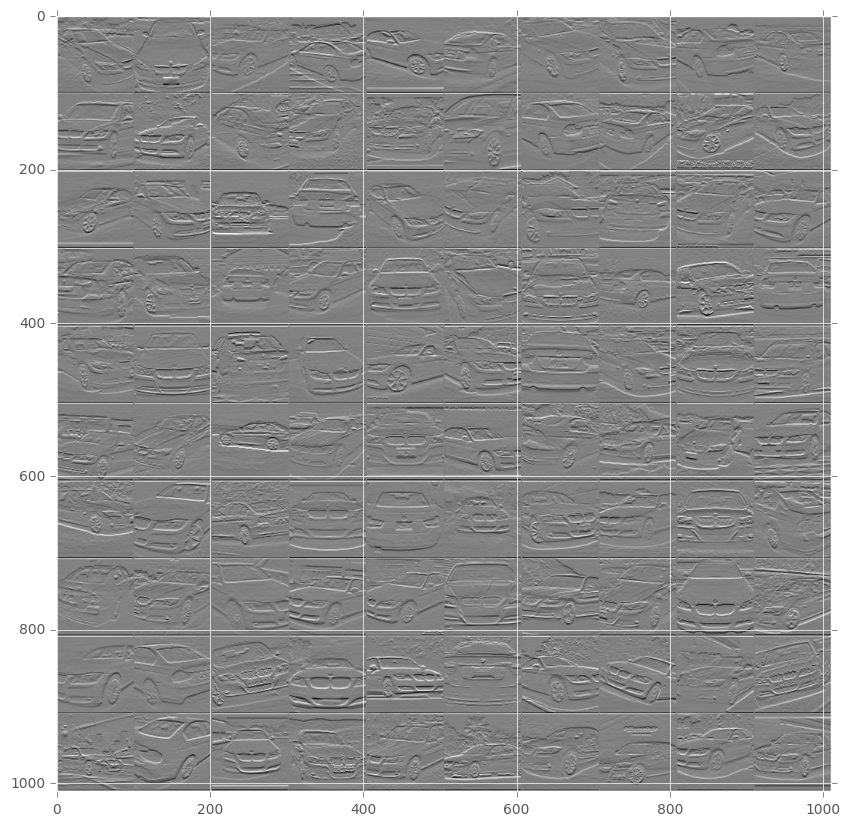

In [59]:
convolved_show = (convolved - np.min(convolved))/(np.max(convolved) - np.min(convolved))
print(convolved_show.shape)
plt.figure(figsize=(10,10))
plt.imshow(utils.montage(convolved_show[..., 0], 'convolved.png'), cmap='gray')

In [66]:
# sort image set

# flatten 4d imageset (N x H x W x C) into (N X (H*W*C))

flattened = tf.reshape(convolved, [100, (100*100)])

In [69]:
assert(flattened.get_shape().as_list() == [100, 10000])

In [82]:
values = tf.reduce_sum(flattened, axis=1)
idxs_op = tf.nn.top_k(values, k=100)[1]
idxs = sess.run(idxs_op)
print(idxs)

sorted_imgs = np.array([imgs[idx_i] for idx_i in idxs])

[38 79 57 11 60 89 84 53 13  5 49 23 66 68 19 98 10 22 87 95 90 34 74  7 54
 63  4 27 14 92 55 20  1 52 86 47 44 33 12 32 45 91 99 39 18 94 16  2 65 69
 67 36 28 58 62 85 51 43 81 72 82  6 40 78 70 25 61 75 88 77  9 24 31 73 56
 17 76 42 96 50 37 80 64  3 59 21  0 46 71 83 29 93 15 26 30 35 41 48  8 97]


In [83]:
sorted_imgs.shape

(100, 100, 100, 3)

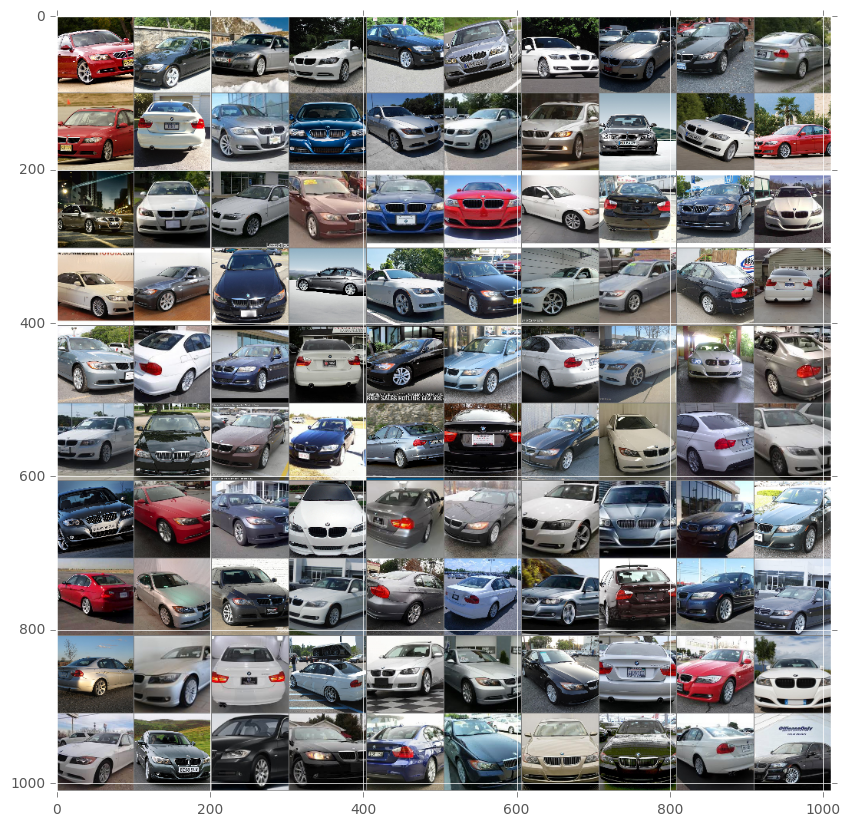

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(utils.montage(sorted_imgs, 'sorted.png'))